# Obtain the data

In [1]:
# Dataset found here: https://www.kaggle.com/giripujar/hr-analytics/data

In [62]:
# Import neccessary modules for data manipulation and visual representation
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

In [63]:
# Read analytics csv file and store dataset into dataframe df
df = pd.read_csv('datasets_11142_15488_HR_comma_sep.csv', index_col=None)


# Data Wrangling

In [41]:
# Check if any missing values in dataset
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [42]:
# Get quick overview of dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Labeling

In [64]:
# Rename columns for better understanding
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Feature conversion

In [65]:
# Convert department and salary to numeric because some functions won't work with strings
df.replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
df['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


# Feature arrangement

In [67]:
# Move reponse variable "turnover" to front of the table -- easier to split into training/testing sets
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
0,1,0.38,0.53,2,157,3,0,0,0,0
1,1,0.80,0.86,5,262,6,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0


# Outlier detection

In [8]:
# describe function checks if any extreme values in data by examining min/max rows. There seem to be no irregularities.
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,3.339823,0.594706
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.820837,0.637183
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,3.000000,1.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000


# Exploratory analysis

In [9]:
# Statistical overview -- dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [10]:
# Check type of features
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
Department               int64
salary                   int64
dtype: object

In [11]:
# Appears that ~76% of employees stayed and 24% of employees left. When performing cross validation, important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [12]:
# Overview of summary -- on average, employees who left had a lower satisfaction level of -20%, worked 8hrs more per month, had a lower salary and a lower promotion rate
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
turnover,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,3.408908,0.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,3.118734,0.414730


In [13]:
# Display statistical overview of employees
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,3.339823,0.594706
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.820837,0.637183
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,3.000000,1.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000


# Correlation matrix and heatmap

Highly correlated features:
1. (+) projectCount, averageMonthlyHours, evaluation
2. (-) turnover, satisfaction, salary

From the heatmap, there appears to be strong positive(+) correlation between projectCount, averageMonthlyHours, and evaluation, which could mean employees who spent more hours and did more projects were evaluated highly. But the feature evaluation, when compared independently with the response variable turnover, shows little to no relationship. For the negative(-) relationships, turnover, satisfaction, and salary are highly correlated. We can presume people tend to leave a company when they are less satisfied and are lowly paid.

AttributeError: module 'seaborn' has no attribute 'plt'

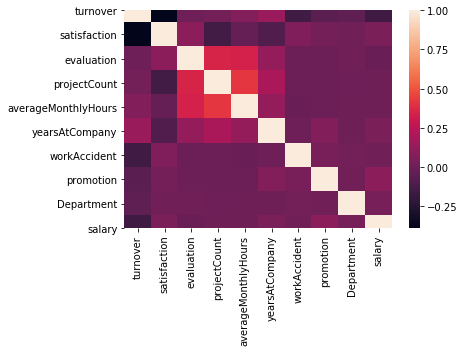

In [14]:
# Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

# Turnover vs department

Top three departments are support, technical, and sales. Most departments have similar turnover rates, but management has the lowest. This could mean people with higher positions tend to stay.

The management department has the highest salary ratio and lowest turnover rate.

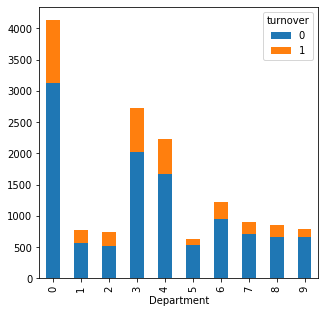

In [15]:
# Dept vs turnover
clarity_color_table = pd.crosstab(index=df["Department"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

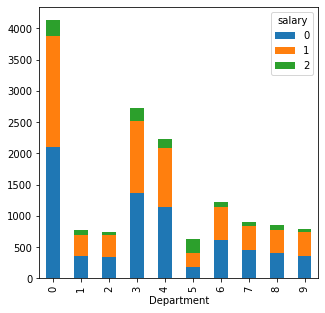

In [16]:
# Dept vs salary
clarity_color_table = pd.crosstab(index=df["Department"], 
                          columns=df["salary"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

# Turnover vs salary

Almost all employees who left had low to medium salary levels. Hardly anyone with high salaries left.

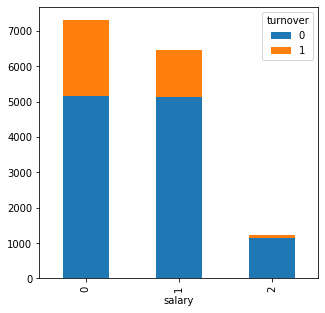

In [17]:
clarity_color_table = pd.crosstab(index=df["salary"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

# Turnover vs promotion

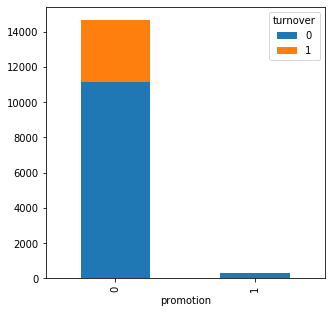

In [18]:
clarity_color_table = pd.crosstab(index=df["promotion"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

# Turnover vs years at company

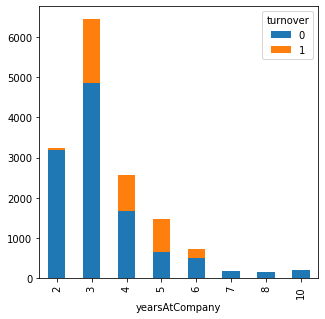

In [19]:
clarity_color_table = pd.crosstab(index=df["yearsAtCompany"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


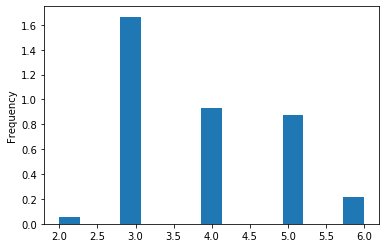

In [20]:
df.loc[(df['turnover'] == 1),'yearsAtCompany'].plot(kind='hist', normed=1, bins=15, stacked=False, alpha=1)

# Turnover vs project count

Over half of employees with only 2 projects left the company. Same for employees with project counts of 6-7. Perhaps we can deduce that employees with project counts of 2 or less do not have enough work or are not highly valued, which compels them to leave the company. And conversely employees with 6+ projects are overworked.

A majority of employes who left only had two projects. There is also an increase in turnover as the number of projects increase. 3 projects looks to be the sweet spot.

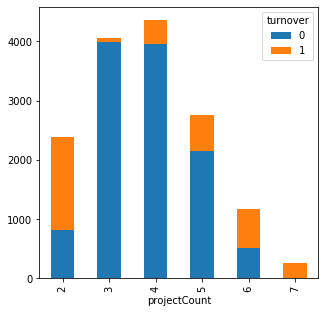

In [21]:
clarity_color_table = pd.crosstab(index=df["projectCount"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

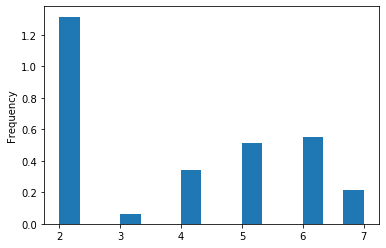

In [22]:
# Histogram showing frequency of people who left the company and their number of projects
df.loc[(df['turnover'] == 1),'projectCount'].plot(kind='hist', normed=1, bins=15, stacked=False, alpha=1)

# Turnover vs evaluation

There is a biomodal distrubtion for turnover. Employees who performed well or not well left the company. Those who stay are within 0.6-0.8

Text(0.5, 1.0, 'Last evaluation')

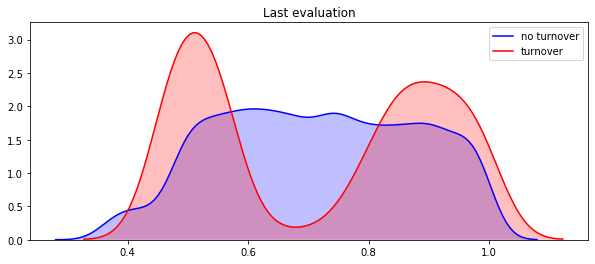

In [23]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Last evaluation')

# Turnover vs average monthly hours

Another bimodal distrubtion for employees with turnover. Employees with less hours of work (~150hours or less) and employees with too many hours of work (~250 or more) left the company.

Text(0.5, 1.0, 'Average monthly hours worked')

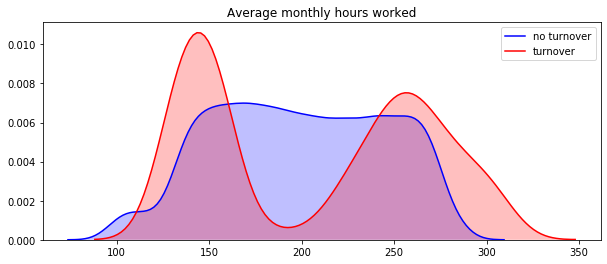

In [24]:
# KDEPlot -- Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Average monthly hours worked')

# ProjectCount vs average monthly hours

An interesting observation about the boxplot graph is the difference in averageMonthlyHours between people with and without turnover. Employees who did not turnover saw consistent averageMonthlyHours despite the increase in projects. In contrast, employees who did have turnover saw an increase in averageMonthlyHours with the increase in projects. So employees who left worked more hours than employees who didn't, even with the same project count

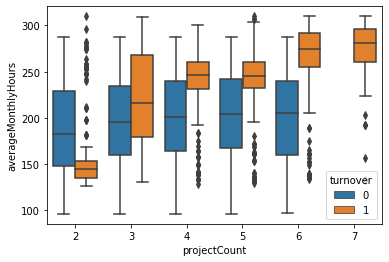

In [25]:
# ProjectCount vs averageMonthlyHours boxplot
# on average employees who stayed worked about 200hours/month while those with turnover worked about 250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

# ProjectCount vs evaluation

This graph looks very similar to the graph above. Within the turnover group, there is an increase in evaluation for employees who did more projects. But within the non-turnover group, employees saw a consistent evaluation score despite the increase in project counts (again).
So employees who left had on average a higher evaluation than employees who did not leave, even with an increase in project count. This goes against the general perception that employees with lower evaluations tend to be more likely to leave a company.

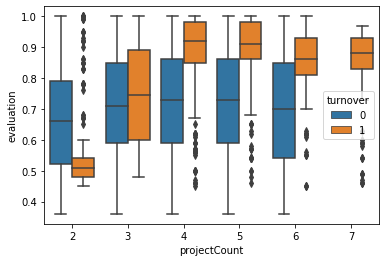

In [26]:
# ProjectCount vs evaluation
# employees who did not leave had an average evaluation of around 70% even with different projectCounts
# There is a heavy skew in employees with turnover -- drastically changes after 3 projectCounts
# employees with two projects and a horrible evaluation left, and employees with > 3 projects and very high evaluations left
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

# ProjectCount vs evaluation vs satisfaction 

On the bottom left corner of the matrix (Evaluation vs satisfaction) we can see three distinct clusters (possible feature engineering):

Cluster 1: Satisfaction below 0.2 and evaluations greater than 0.75, which could be a good indication that employees who left were good at their job but did not like it. This cluster could signify employees who are overworked. 

Cluster 2: Satisfaction between ~0.35~0.45 and evaluations below ~0.58. This could indicate employees who were poorly evaluated and also did not enjoy their job. This cluster could signify under-performers. 

Cluster 3: Satisfaction between 0.7~1.0 and evaluations greater than 0.8, which could indicate the ideal employees who were evaluated highly and enjoyed their job. This cluster could signify employees who left because they found better opportunities. 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23d10790>,
      dtype=object)

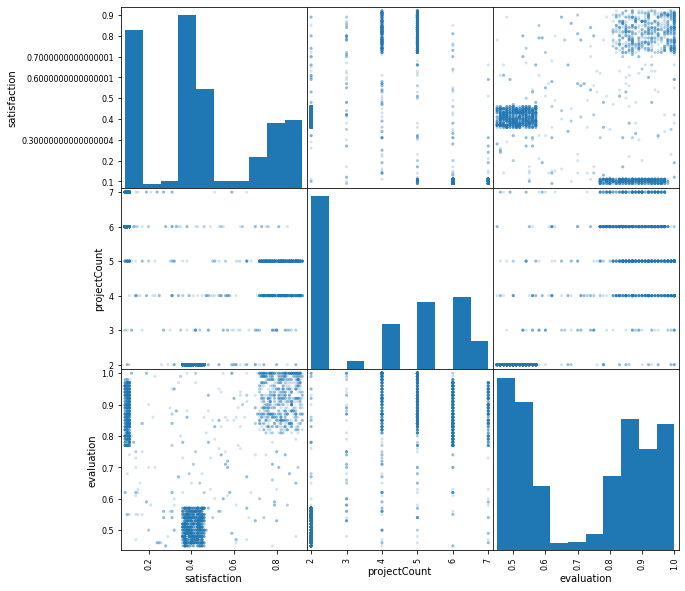

In [27]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# scatter matrix for employees with turnover
fig, ax = plt.subplots(figsize=(10,10))
turnoverDF = df[df['turnover']==1]
scatter_matrix(turnoverDF[['satisfaction','projectCount','evaluation']], alpha=0.2, diagonal='hist', ax=ax)

# Data modeling

The best model out of the four (Decision Tree Model, AdaBoost Model, Logistic Regression Model, Random Forest Model) was Random Forest

A Base Rate Model is a model that always selects the target variable's majority class. It is used for reference to compare how much better another model is against it. In this dataset, the majority class that will be predicted will be 0's, which are employees who did not leave the company.
24% of the dataset contained 1's (employee who left the company) and the remaining 76% contained 0's (employee who did not leave the company). The Base Rate Model would simply predict all 0's and ignore all 1's.
The base rate accuracy for this dataset, when classifying everything as 0's, would be 76% because 76% of the dataset is labeled as 0 (employees not leaving the company).

Evaluating the model

Precision and Recall / Class Imbalance

This dataset is an example of a class imbalance problem because of the skewed distribution of employees who did and did not leave. The more skewed the class the more accuracy breaks down.

In this case, evaluating our model’s algorithm based on accuracy is incorrect. We would need to know the different errors and correct decisions. Accuracy alone does not measure an important concept that needs to be taken into consideration: False Positive and False Negative errors.

False Positives (Type I Error): We predict that the employee will leave, but they do not
False Negatives (Type II Error): We predict that the employee will not leave, but they do leave

Different Ways to Evaluate Classification Models

Predictive Accuracy: How many does it get right?
Speed: How fast does it take for the model to deploy?
Scalability: Can the model handle large datasets?
Robustness: How well does the model handle outliers/missing values?
Interpretability: Is the model easy to understand?

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

# Create dummy variables for the 'department' and 'salary' features since they are categorical 
department = pd.get_dummies(data=df['Department'],drop_first=True,prefix='dep') #drop first column to avoid dummy trap
salary = pd.get_dummies(data=df['salary'],drop_first=True,prefix='sal')
df.drop(['Department','salary'],axis=1,inplace=True)
df = pd.concat([df,department,salary],axis=1)

In [69]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [70]:
# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [71]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.76


In [72]:
# Check accuracy of logistic model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.79


In [73]:
# use 10 fold Cross-Validation to train Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AUC: 0.829 (0.011)


# Logistic Regression vs Random Forest vs Decision Tree vs AdaBoost Model

In [74]:
# Compare Logistic Regression Model vs Base Rate Model vs Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# By adding in "class_weight = balanced", the Logistic Auc increased by about 10% -- this adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1714
           1       0.00      0.00      0.00       536

    accuracy                           0.76      2250
   macro avg       0.38      0.50      0.43      2250
weighted avg       0.58      0.76      0.66      2250



 ---Logistic Model---
Logistic AUC = 0.78
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1714
           1       0.50      0.80      0.62       536

    accuracy                           0.76      2250
   macro avg       0.71      0.78      0.72      2250
weighted avg       0.82      0.76      0.78      2250



 ---Decision Tree Model---
Decision Tree AUC = 0.94
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1714
           1       0.92      0.91      0.92       536

    accuracy                           0.96   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 ---Random Forest Model---
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1714
           1       0.99      0.96      0.97       536

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250



 ---AdaBoost Model---
AdaBoost AUC = 0.93
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1714
           1       0.91      0.88      0.89       536

    accuracy                           0.95      2250
   macro avg       0.94      0.93      0.93      2250
weighted avg       0.95      0.95      0.95      2250



# ROC graph

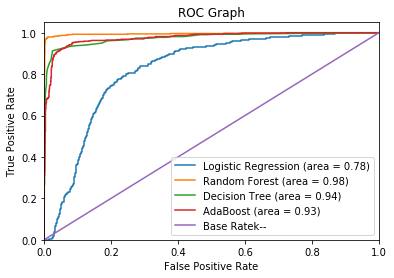

In [75]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Feature importance

Top 3 features:
Satisfaction
YearsAtCompany
Evaluation

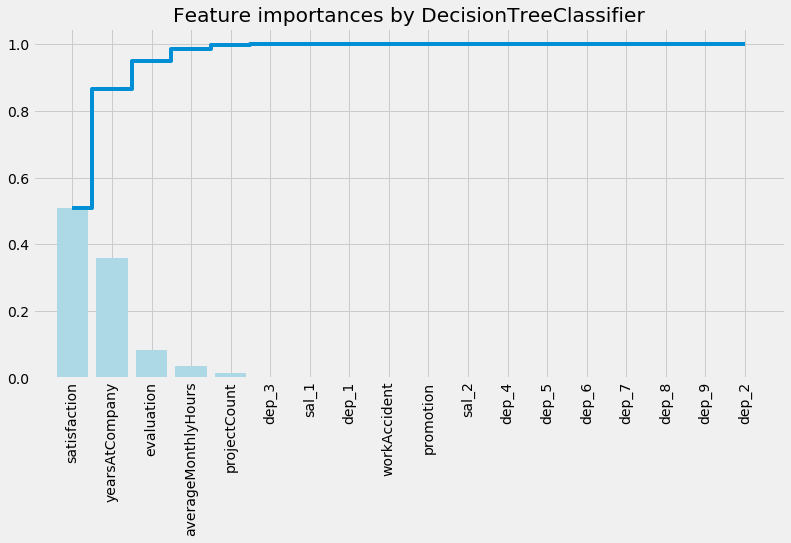

In [76]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Visualize the Decision Tree Model

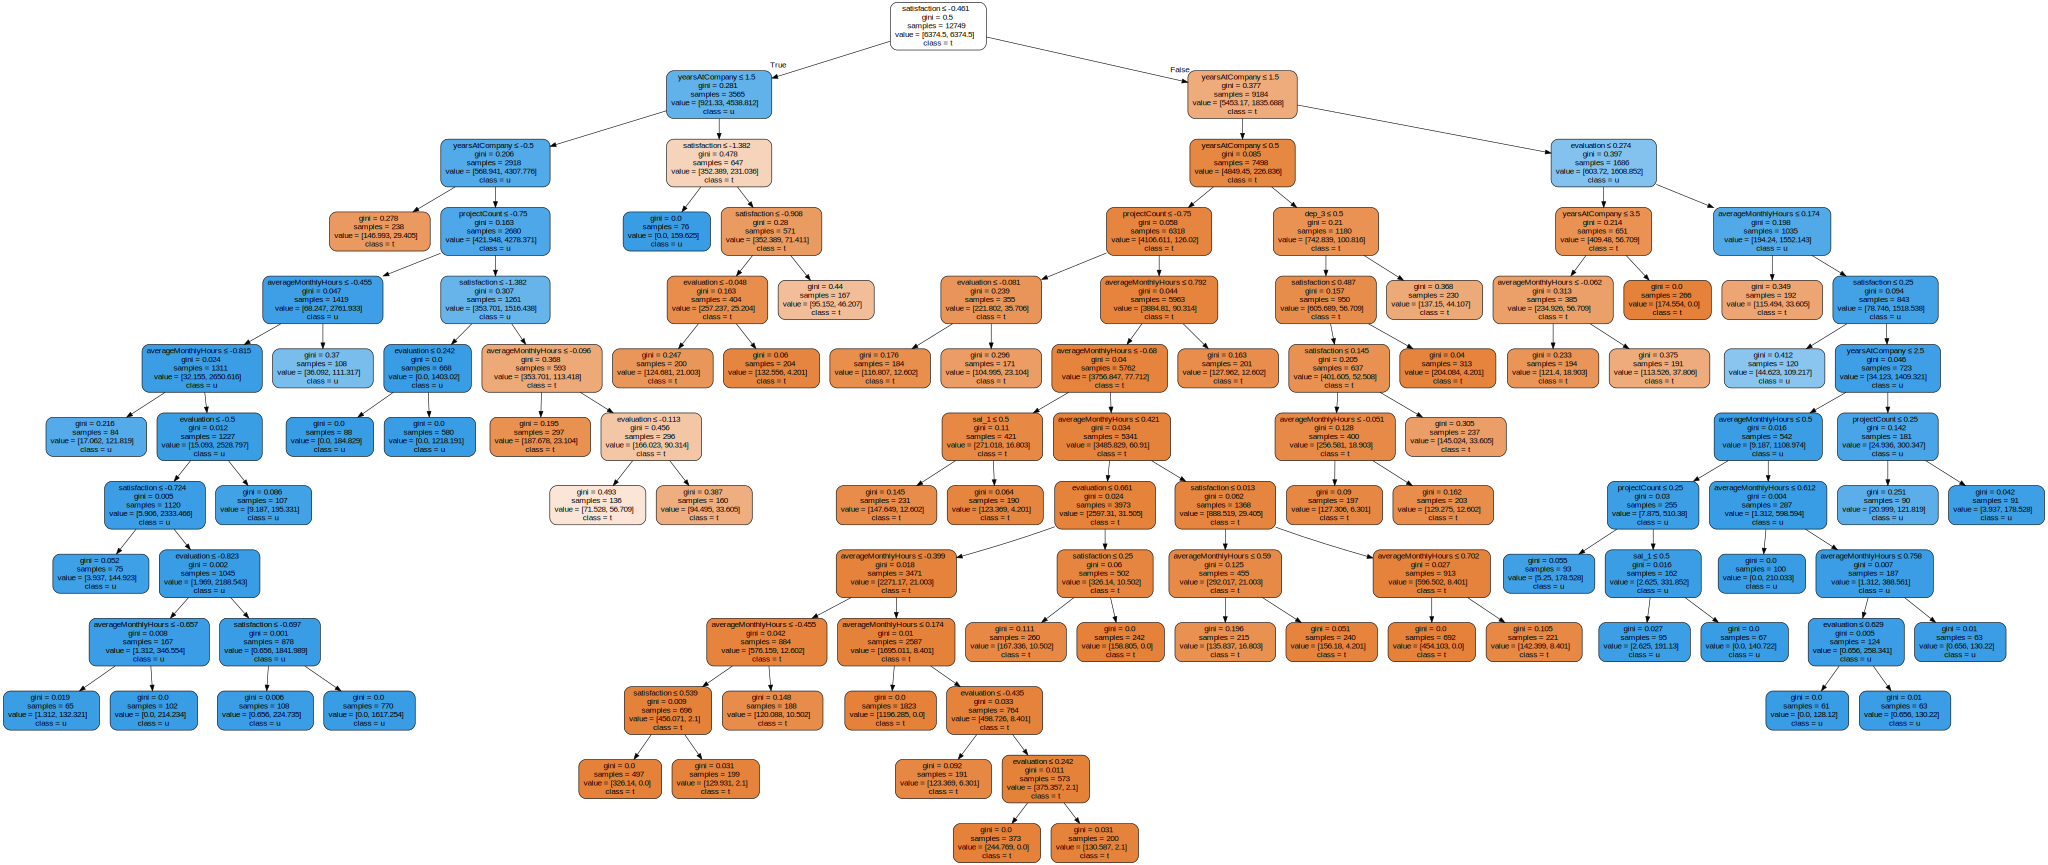

In [80]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Employee Turnover") 

dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=feat_names,  
                         class_names='turnover',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Data interpretation

Employees leave when working ~6hours/day (underworked) and ~10hours/day (overworked)
Most employees who left had low-medium salaries
Most employees who left did not get promoted
Most employees who left had evaluation scores below 0.6 and above 0.8
As project count increased, so did the turnover rate. Most employees who left had 2 projects. All employees with 7 projects left. Employees with 3 projects had the least turnovers.

Project count, average monthly hours, and evaluation had a positive correlation, thus the more employees worked the higher evaluations they received.
Turnover, satisfaction, and salary had a negative correlation, thereby lower satisfaction and lower salary resulted in a higher turnover rate.

We can observe that satisfaction affects turnover the most, and that there were very few promotions. We also see that employees who left the company worked more hours than employees who stayed, although they had the same number of projects. And lastly, employees who left had on average higher evaluations than employees who stayed (even with an increase in project count), which contradicts the general principle that employees with lower evaluations tend to leave more.